This notebook shows an example of the data that's tracked and some visualizations that can be made. 

# Setup

In [1]:
from fallGuysStructures import *
from fallGuysFcns import *
import fallGuysVisuals as fgv

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os, datetime
import pandas as pd
import numpy as np

# Some setup
plt.rcParams['font.size'] = 14

shows_df, rounds_df, qual_df = getDataFrames(testing=True) # would want to get rid of testing=True for others

finals_df = rounds_df[np.isin(rounds_df['Map'], list_of_finals)] # just finals
non_finals_df = rounds_df[~np.isin(rounds_df['Map'], list_of_finals)] # remove finals

In [2]:
shows_df.tail()

,Show ID,Start Time,Season,Time Taken,Game Mode,Final,Rounds,Username,Party Size,addID,Kudos,Fame,Crowns,CurrentCrownShards
855,856,2021-05-10 21:42:43.284000,4,193.938,event_only_fall_ball_1005_to_1205_2021,False,1,Infallible Laughing Penguin,na,02:45:57.222,30,0,0,9.0
856,857,2021-05-10 21:47:34.706000,4,479.259,squads_4player,False,3,Infallible Laughing Penguin,na,02:55:33.965,215,0,0,9.0
857,858,2021-05-10 21:57:01.582000,4,577.259,squads_4player,True,4,Infallible Laughing Penguin,na,03:06:38.841,230,0,0,17.0
858,859,2021-05-10 22:07:58.527000,4,356.156,squads_4player,False,2,Infallible Laughing Penguin,na,03:13:54.683,120,0,0,25.0
859,860,2021-05-10 22:15:46.251000,4,651.578,squads_4player,False,5,Infallible Laughing Penguin,na,03:26:37.829,335,0,0,25.0


In [3]:
rounds_df.tail(10)

,Show ID,Round Num,Map,Time Spent,Round Length,Qualified,Position,Kudos,Fame,Bonus Tier,Bonus Kudos,Bonus Fame,BadgeId,Participants,Qualification Percent,Actual Num Qual,Team Score,Actual Num Qual with Finals,Timeout,Normalized Position
2735,858,1,round_gauntlet_04_squads,94.970,120.4,True,28,20,0,3.0,0,0,NaN,40,100,38.0,80.0,38.0,False,70.00
2736,858,2,round_fruitpunch_squads,90.230,90.29,True,10,60,0,0.0,35,0,gold,28,0,0.0,303.0,17.0,False,35.71
2737,858,3,round_floor_fall_squads,62.436,63.753,False,11,50,0,3.0,0,0,NaN,20,0,1.0,0.0,1.0,False,55.00
2738,859,0,round_gauntlet_06_squads,72.254,150.53,True,5,30,0,1.0,70,0,silver,60,100,49.0,188.0,49.0,False,8.33
2739,859,1,round_gauntlet_01_squads,60.602,64.854,False,30,20,0,3.0,0,0,NaN,39,100,39.0,61.0,39.0,False,76.92
2740,860,0,round_chompchomp_squads,32.403,59.7,True,15,30,0,2.0,35,0,bronze,30,0,40.0,110.0,39.0,False,50.00
2741,860,1,round_dodge_fall_squads,40.559,62.261,True,16,20,0,3.0,0,0,NaN,30,100,29.0,66.0,29.0,False,53.33
2742,860,2,round_fruitpunch_squads,89.538,90.24,True,11,60,0,0.0,35,0,gold,22,0,0.0,225.0,5.0,False,50.00
2743,860,3,round_snowballsurvival_squads,60.700,60.13,True,6,50,0,0.0,35,0,gold,16,0,0.0,240.0,10.0,False,37.50
2744,860,4,round_egg_grab_02_squads,120.280,120.31,False,11,70,0,3.0,0,0,NaN,12,100,0.0,9.0,8.0,False,91.67


# Map Stats

In [4]:
# Get a DataFrame containing info for each different map
maps_df = getMapInfoDataFrame(rounds_df, qual_df)
maps_df.head(10)

,Name,Type,Attempts,Times Qualified,Percent Qualified,Average Position,Average Qual Position,Average Norm Qual Position,Average Qual Time (s),Fastest Qual Time (s),Average Qual Round Times (s),Total Kudos,Total Fame,Average Kudos,Average Fame,Average Team Score,Bonus: Gold,Bonus: Silver,Bonus: Bronze,Average Tier
round_floor_fall_event_only_01,Hex-A-Gone 1 (Hex-a-gone Trials),Survival,126,113,89.682540,8.642857,7.619469,38.146195,41.268097,14.903,41.276044,7735,1740,61.388889,13.809524,NaN,113,0,0,0.309524
round_floor_fall_event_only_02,Hex-A-Gone 2 (Hex-a-gone Trials),Survival,113,95,84.070796,5.849558,4.778947,32.613684,65.525200,48.504,65.532053,5585,1276,49.424779,11.292035,NaN,95,0,0,0.477876
round_floor_fall_event_only_final,Hex-A-Gone Final (Hex-a-gone Trials),Final,92,10,10.869565,4.380435,1.000000,11.027000,127.638100,118.136,127.640200,12870,783,139.891304,8.510870,NaN,10,0,0,2.673913
round_thin_ice_event_only_01,Thin Ice (Thin Ice Trials),Survival,79,70,88.607595,9.962025,8.957143,45.308143,37.288171,12.602,37.305729,4820,0,61.012658,0.000000,NaN,70,0,0,0.341772
round_jump_club_event_only_01,Jump Club 1 (Jump Around),Survival,77,70,90.909091,12.103896,10.742857,35.830714,36.621643,21.536,36.641571,4760,474,61.818182,6.155844,NaN,70,0,0,0.272727
round_thin_ice_event_only_02,Thin Ice (Thin Ice Trials),Survival,70,61,87.142857,5.685714,4.868852,33.498689,67.950574,32.418,67.925672,3535,0,50.500000,0.000000,NaN,61,0,0,0.385714
round_fruitpunch_squads,None,None,70,41,58.571429,13.000000,9.487805,39.822439,81.634220,29.905,90.348293,4335,948,61.928571,13.542857,260.957143,41,0,0,1.242857
round_jump_club_event_only_02,Jump Club 2 (Jump Around),Survival,70,66,94.285714,10.700000,10.045455,43.295152,34.238061,24.956,34.268212,3710,306,53.000000,4.371429,NaN,66,0,0,0.171429
round_jump_club_event_only_03,Jump Club 3 (Jump Around),Survival,66,56,84.848485,6.196970,4.964286,28.888750,39.862196,28.399,39.860446,5920,266,89.696970,4.030303,NaN,56,0,0,0.454545
round_biggestfan,Big Fans,Race,63,63,100.000000,8.507937,8.507937,17.313968,83.560730,55.290,176.656206,5440,2726,86.349206,43.269841,NaN,3,43,15,1.253968


# Round Stats

In [5]:
# Get a DataFrame containing info for each round number 
# (if a final occurs during round 5, that data is in 'final' and not '5')

# Give a switch to say if finals should be separate or not?
rounds_data_df = getRoundInfoDataFrame(rounds_df)
rounds_data_df

,Attempted,Qualified,Percent
Round Num,,,
1,860,760,88.372093
2,760,625,82.236842
3,464,344,74.137931
4,267,168,62.921348
5,47,21,44.680851
6,3,2,66.666667
final,344,42,12.209302


# Show Stats

In [6]:
# Get a DataFrame containing info for shows by season and total

# add new things to 'getShowStats'
shows_info_df = getShowsInfoDataFrame(shows_df)
shows_info_df

,Total Shows,Total Wins,Total Finals,Average Time (s),Average Rounds,Average Kudos,Average Fame,% Made Finals,% Won,Total Time (hours),Minutes Per Win
2,117,8,47,598.054487,3.931624,360.811966,153.965812,40.170940,6.837607,19.436771,145.775781
3,318,23,206,389.181107,3.163522,265.235849,64.427673,64.779874,7.547170,34.377664,85.944161
4,425,13,174,435.115678,3.009412,245.223529,56.752941,40.941176,3.058824,51.367823,237.082260
total,860,44,427,440.297826,3.191860,268.348837,72.816279,49.651163,5.232558,105.182258,140.243011


# Playlist Stats

In [7]:
# Get a DataFrame containing info for shows by playlist and total
playlist_df = getPlaylistInfoDataFrame(shows_df, rounds_df)
playlist_df

C:\Users\Joseph\BreadTeleportationTechnology\DataScience\Fall Guys\fallGuysFcns.py:427: RuntimeWarning: divide by zero encountered in double_scalars
  'Minutes Per Win': shows_df['Time Taken'].sum() / 60 / shows_df['Crowns'].sum(),


,Total Shows,Total Wins,Total Finals,Average Time (s),Average Rounds,Average Kudos,Average Fame,% Made Finals,% Won,Total Time (hours),Minutes Per Win
main_show,240,18,107,587.166725,3.958333,366.062500,161.850000,44.583333,7.916667,39.144448,123.614047
event_only_hard_mode_2111_to_2711,2,0,0,325.063500,2.500000,132.500000,61.500000,0.000000,0.000000,0.180591,inf
event_season_3_highlight_1512_to_1912,9,0,5,571.339111,4.111111,305.555556,163.666667,55.555556,0.000000,1.428348,inf
event_only_floor_fall_0501_to_0701,37,1,32,340.677270,2.810811,184.054054,103.216216,86.486486,2.702703,3.501405,210.084317
event_fruit_basket_0801_to_1401,1,0,1,310.640000,3.000000,180.000000,106.000000,100.000000,0.000000,0.086289,inf
event_only_survival_2501_to_0102_2021,3,0,0,390.081333,2.666667,171.666667,104.666667,0.000000,0.000000,0.325068,inf
event_only_season_3_variation_0202_to_0702_2021,3,0,1,431.502000,3.333333,208.333333,118.333333,33.333333,0.000000,0.359585,inf
event_fan_favourites_0802_to_1102_2021,7,0,3,492.582571,3.285714,220.714286,121.857143,42.857143,0.000000,0.957799,inf
event_only_jump_club_1202_to_1402_2021,44,0,31,316.750114,3.500000,223.181818,26.954545,70.454545,0.000000,3.871390,inf
event_only_races_any_final_1502_to_1802_2021,1,0,0,593.942000,4.000000,265.000000,0.000000,0.000000,0.000000,0.164984,inf


# Squad Mode Stats

In [8]:
squad_shows_df, squad_rounds_df = getSquadDataFrames(shows_df, rounds_df)
squad_shows_df.tail()

,Show ID,Start Time,Season,Time Taken,Game Mode,Final,Rounds,Username,Party Size,addID,Kudos,Fame,Crowns,CurrentCrownShards,Wins
841,842,2021-05-08 00:25:53.901000,4,794.680,squads_4player,True,5,Infallible Laughing Penguin,4,05:39:08.581,370,0,0,55.0,0
856,857,2021-05-10 21:47:34.706000,4,479.259,squads_4player,False,3,Infallible Laughing Penguin,na,02:55:33.965,215,0,0,9.0,0
857,858,2021-05-10 21:57:01.582000,4,577.259,squads_4player,True,4,Infallible Laughing Penguin,na,03:06:38.841,230,0,0,17.0,0
858,859,2021-05-10 22:07:58.527000,4,356.156,squads_4player,False,2,Infallible Laughing Penguin,na,03:13:54.683,120,0,0,25.0,0
859,860,2021-05-10 22:15:46.251000,4,651.578,squads_4player,False,5,Infallible Laughing Penguin,na,03:26:37.829,335,0,0,25.0,0


In [9]:
squad_rounds_df.tail()

,Show ID,Round Num,Map,Time Spent,Round Length,Qualified,Position,Kudos,Fame,Bonus Tier,Bonus Kudos,Bonus Fame,BadgeId,Participants,Qualification Percent,Actual Num Qual,Team Score,Actual Num Qual with Finals,Timeout,Normalized Position
2740,860,0,round_chompchomp_squads,32.403,59.7,True,15,30,0,2.0,35,0,bronze,30,0,40.0,110.0,39.0,False,50.00
2741,860,1,round_dodge_fall_squads,40.559,62.261,True,16,20,0,3.0,0,0,NaN,30,100,29.0,66.0,29.0,False,53.33
2742,860,2,round_fruitpunch_squads,89.538,90.24,True,11,60,0,0.0,35,0,gold,22,0,0.0,225.0,5.0,False,50.00
2743,860,3,round_snowballsurvival_squads,60.700,60.13,True,6,50,0,0.0,35,0,gold,16,0,0.0,240.0,10.0,False,37.50
2744,860,4,round_egg_grab_02_squads,120.280,120.31,False,11,70,0,3.0,0,0,NaN,12,100,0.0,9.0,8.0,False,91.67


# Other

In [10]:
# Get a DataFrame containing data for only final maps
maps_df[ maps_df['Type'] == 'Final' ]

,Name,Type,Attempts,Times Qualified,Percent Qualified,Average Position,Average Qual Position,Average Norm Qual Position,Average Qual Time (s),Fastest Qual Time (s),Average Qual Round Times (s),Total Kudos,Total Fame,Average Kudos,Average Fame,Average Team Score,Bonus: Gold,Bonus: Silver,Bonus: Bronze,Average Tier
round_floor_fall_event_only_final,Hex-A-Gone Final (Hex-a-gone Trials),Final,92,10,10.869565,4.380435,1.000000,11.027000,127.638100,118.136,127.640200,12870,783,139.891304,8.510870,NaN,10,0,0,2.673913
round_thin_ice_event_only_final,Thin Ice (Thin Ice Trials),Final,61,6,9.836066,4.442623,1.000000,10.925000,157.186833,134.553,157.189000,8070,0,132.295082,0.000000,NaN,6,0,0,2.704918
round_jump_showdown_jump_club_event_only_final,Jump Showdown (Jump Around),Final,56,6,10.714286,4.732143,1.166667,10.528333,226.903667,139.286,226.909833,7210,140,128.750000,2.500000,NaN,6,0,0,2.678571
round_floor_fall,Hex-A-Gone,Final,39,2,5.128205,4.076923,1.000000,8.330000,106.807000,92.734,106.818000,4190,1086,107.435897,27.846154,NaN,2,0,0,2.846154
round_jump_showdown,Jump Showdown,Final,31,4,12.903226,5.096774,1.000000,9.820000,187.000750,142.522,187.005500,5060,1497,163.225806,48.290323,NaN,4,0,0,2.612903
round_fall_mountain_hub_complete,Fall Mountain,Final,26,8,30.769231,4.038462,1.000000,11.215000,38.614250,35.305,35.556250,7640,2148,293.846154,82.615385,NaN,8,0,0,2.076923
round_tunnel_final,Roll Off,Final,17,1,5.882353,4.058824,1.000000,11.110000,150.920000,150.920,150.922000,1875,380,110.294118,22.352941,NaN,1,0,0,2.823529
round_thin_ice,Thin Ice,Final,17,3,17.647059,4.588235,1.000000,9.443333,131.022333,105.602,131.025000,3365,889,197.941176,52.294118,NaN,3,0,0,2.470588
round_royal_rumble,Royal Fumble,Final,5,2,40.000000,3.400000,1.000000,16.670000,91.486000,90.200,90.350000,1760,263,352.000000,52.600000,NaN,2,0,0,1.800000
round_lava_event_only_slime_climb_final,Slime Climb 1 (SCT),Final,4,1,25.000000,3.250000,1.000000,33.330000,57.970000,57.970,57.972000,1075,314,268.750000,78.500000,NaN,1,0,2,1.750000


In [11]:
# Get a Series containing number of times eliminated by map
rounds_df[rounds_df['Qualified'] == False]['Map'].value_counts()

round_floor_fall_event_only_final                 82
round_thin_ice_event_only_final                   55
round_jump_showdown_jump_club_event_only_final    50
round_floor_fall                                  37
round_fruitpunch_squads                           29
                                                  ..
round_iceclimb_squads                              1
round_lava_event_only_slime_climb_02               1
round_lava_event_only_yeetus                       1
round_block_party_3_point_5_fan_favourite          1
round_lava_event_only_slime_climb_03               1
Name: Map, Length: 112, dtype: int64

In [12]:
# Get a DataFrame containing the finals that were won
finals_df[finals_df['Qualified']]

,Show ID,Round Num,Map,Time Spent,Round Length,Qualified,Position,Kudos,Fame,Bonus Tier,Bonus Kudos,Bonus Fame,BadgeId,Participants,Qualification Percent,Actual Num Qual,Team Score,Actual Num Qual with Finals,Timeout,Normalized Position
38,11,4,round_jump_showdown,181.522,181.524,True,1,770,210,0.0,35,18,gold,10,0,1.0,NaN,NaN,NaN,10.00
207,54,4,round_fall_mountain_hub_complete,39.191,36.421,True,1,770,210,0.0,35,18,gold,5,0,1.0,NaN,NaN,NaN,20.00
215,56,4,round_floor_fall,120.880,120.9,True,1,770,210,0.0,35,18,gold,12,0,1.0,NaN,NaN,NaN,8.33
293,75,4,round_jump_showdown,142.522,142.524,True,1,770,210,0.0,35,18,gold,8,0,1.0,NaN,NaN,NaN,12.50
298,76,4,round_fall_mountain_hub_complete,38.975,36.203,True,1,770,210,0.0,35,18,gold,9,0,1.0,NaN,NaN,NaN,11.11
317,82,4,round_fall_mountain_hub_complete,38.835,36.86,True,1,770,210,0.0,35,18,gold,9,0,1.0,NaN,NaN,NaN,11.11
356,91,4,round_fall_mountain_hub_complete,38.281,35.516,True,1,770,210,0.0,35,18,gold,10,0,1.0,NaN,NaN,NaN,10.00
416,106,4,round_fall_mountain_hub_complete,35.305,32.538,True,1,770,210,0.0,35,18,gold,10,0,1.0,NaN,NaN,NaN,10.00
503,128,4,round_jump_showdown,225.239,225.244,True,1,770,175,0.0,35,18,gold,13,0,1.0,NaN,NaN,NaN,7.69
534,135,4,round_fall_mountain_hub_complete,39.421,36.672,True,1,770,175,0.0,35,18,gold,12,0,1.0,NaN,NaN,NaN,8.33


# Visuals

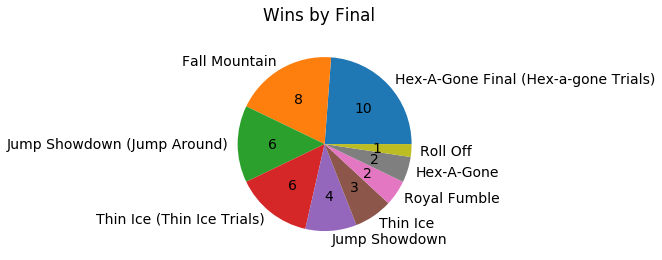

In [13]:
# Get a pie chart for final map wins
fgv.finalMapWinsPie(finals_df);

gold           1
silver        11
bronze        19
none           1
eliminated     9
Name: BadgeId, dtype: int64

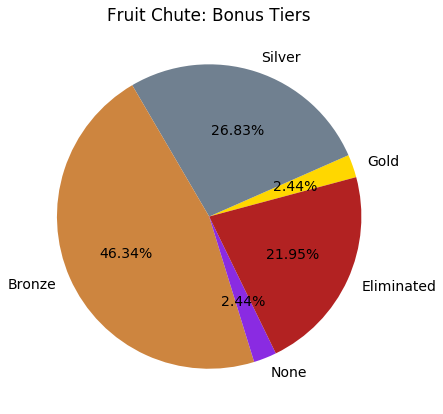

In [14]:
# Get a pie chart for a certain map - bonus tier
# can take either map names or their variables (round_dodge_fall)
fgv.mapBonusTiersPie(rounds_df, 'round_dodge_fall', eliminated=True, percent=True)

main_show                                   17
event_only_floor_fall_2302_to_2502_2021      5
event_only_thin_ice_1903_to_2203_2021        5
event_only_jump_club_1204_to_1404_2021       4
event_only_floor_fall_1203_to_1403_2021      2
event_only_jump_club_0603_to_0803_2021       2
event_only_floor_fall_0705_to_0905_2021      2
event_only_survival_0904_to_1104_2021        1
event_only_floor_fall_0501_to_0701           1
event_fan_favourites_1804_to_2004_2021       1
event_only_slime_climb_0504_to_0804_2021     1
event_only_fall_ball_1005_to_1205_2021       1
event_only_thin_ice_2904_to_0205_2021        1
Name: Game Mode, dtype: int64

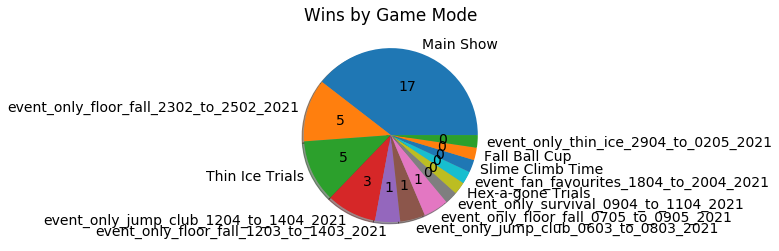

In [15]:
# Get a pie chart for wins by show
fgv.showWinsPie(shows_df)

In [16]:
# Get a Series containing times played each show
# extra for now
shows_df['Game Mode'].value_counts()

main_show                                          240
squads_4player                                     170
squads_4player_2203_to_0404_2021                    71
event_only_thin_ice_1903_to_2203_2021               55
event_only_jump_club_1202_to_1402_2021              44
event_only_floor_fall_0501_to_0701                  37
event_only_floor_fall_1203_to_1403_2021             37
event_only_floor_fall_2302_to_2502_2021             32
event_only_jump_club_1204_to_1404_2021              27
event_only_thin_ice_2904_to_0205_2021               24
event_only_survival_0904_to_1104_2021               22
event_only_floor_fall_0705_to_0905_2021             20
event_only_survival_1902_to_2202_2021               12
event_season_3_highlight_1512_to_1912                9
event_only_slime_climb_0504_to_0804_2021             8
event_fan_favourites_0802_to_1102_2021               7
event_only_jump_club_0603_to_0803_2021               6
event_fan_favourites_1804_to_2004_2021               6
event_only

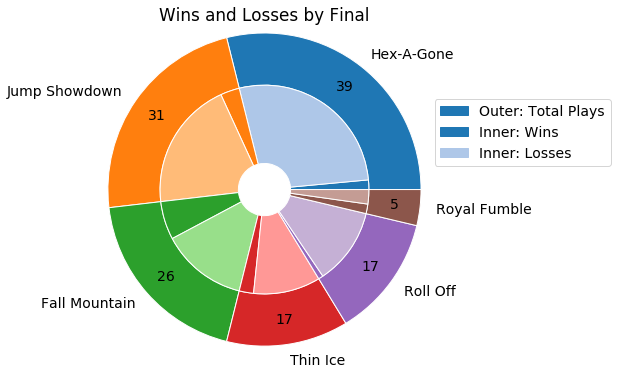

In [17]:
# Get a layered pie chart for plays vs wins and losses by final map
fgv.finalsWinsLossesPie(finals_df, regular=True, total_num=True); 

,overall,pos,neg
round_biggestfan,63,63,0
round_gauntlet_04,46,46,0
round_see_saw,44,44,0
round_gauntlet_01,41,39,2
round_gauntlet_05,32,32,0
round_gauntlet_02,32,31,1
round_door_dash,30,29,1
round_gauntlet_03,28,28,0
round_chompchomp,26,25,1
round_tunnel_race,22,21,1


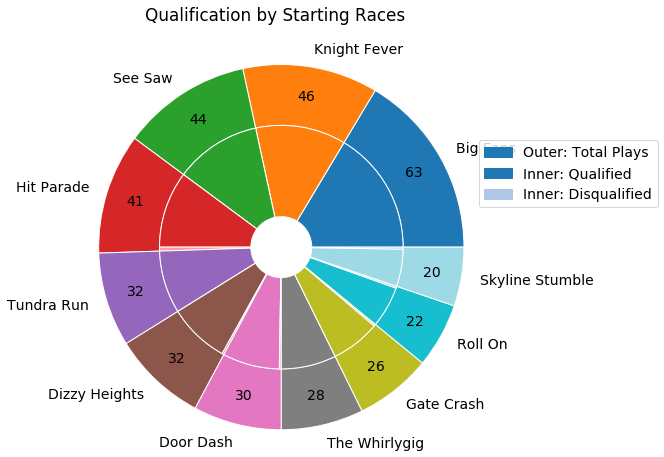

In [18]:
# Get a layered pie chart for qualfied vs non_qualified for starting races
fgv.startingRacesPie(rounds_df, total_num=True, pie_size=(7,7))

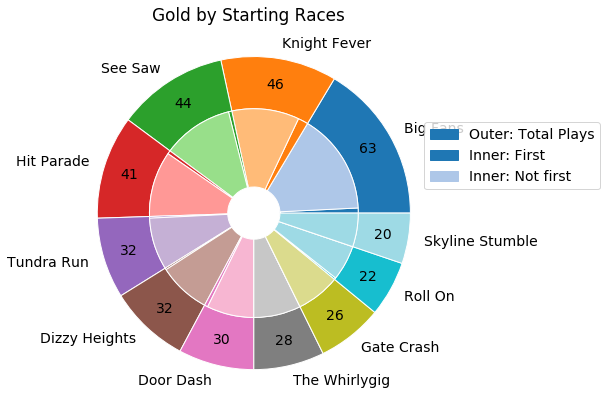

In [19]:
# Get a layered pie chart for gold vs non-gold for starting races
fgv.startingRacesPie(rounds_df, inner='gold', title='Gold by Starting Races', outer_title='Total Plays', 
                 inner_pos_title='First', inner_neg_title='Not first', total_num=True);

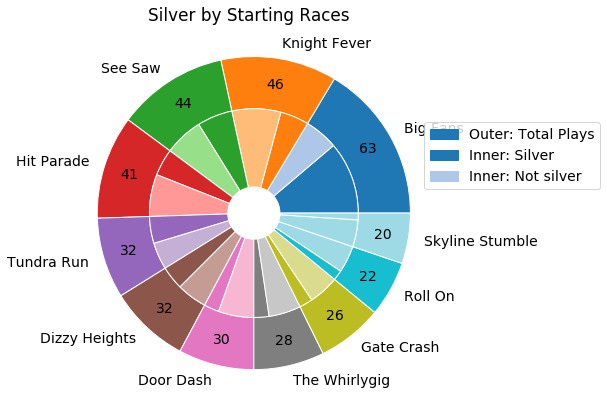

In [20]:
# Get a layered pie chart for silver vs non-silver for starting races
fgv.startingRacesPie(rounds_df, inner='silver', title='Silver by Starting Races', outer_title='Total Plays', 
                 inner_pos_title='Silver', inner_neg_title='Not silver', total_num=True);

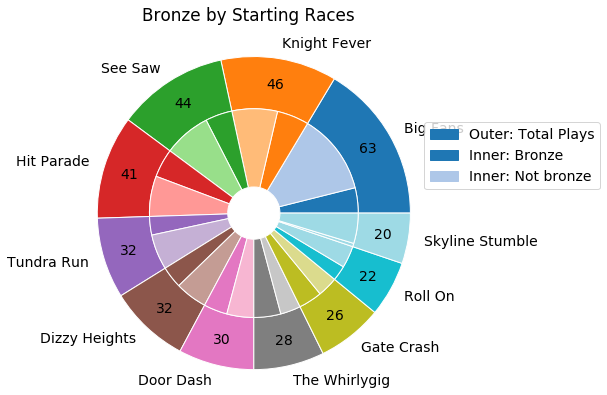

In [21]:
# Get a layered pie chart for bronze vs non-bronze for starting races
fgv.startingRacesPie(rounds_df, inner='bronze', title='Bronze by Starting Races', outer_title='Total Plays', 
                 inner_pos_title='Bronze', inner_neg_title='Not bronze', total_num=True);

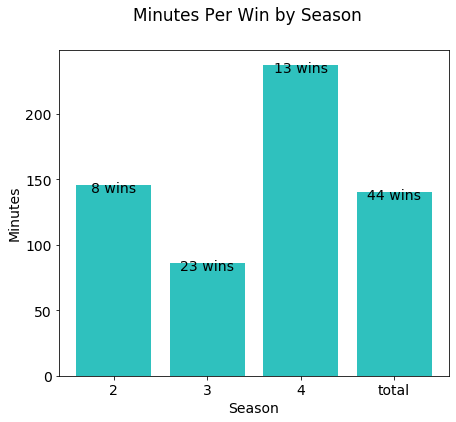

In [22]:
# Get a bar graph for average time per win by season and total
fgv.minutesPerWinBar(shows_info_df)

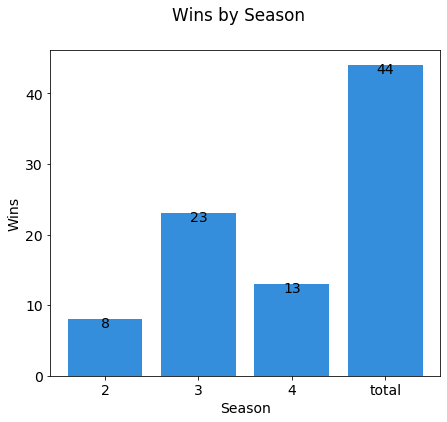

In [23]:
# Get a bar chart for wins by season
fgv.winsBySeasonBar(shows_info_df)

In [24]:
# Get win streaks (returns row ids for shows_df)
getStreaks(shows_df)

[[74, 75], [397, 398, 399], [680, 681]]

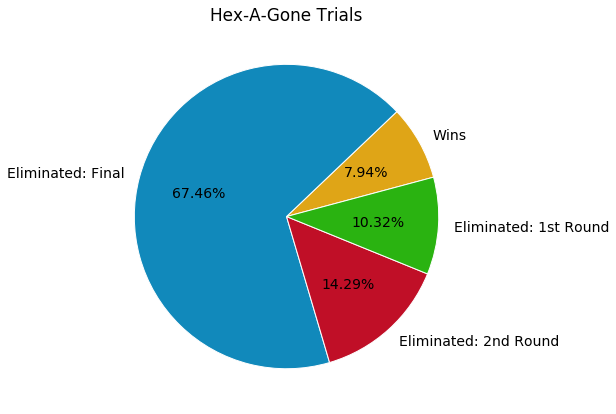

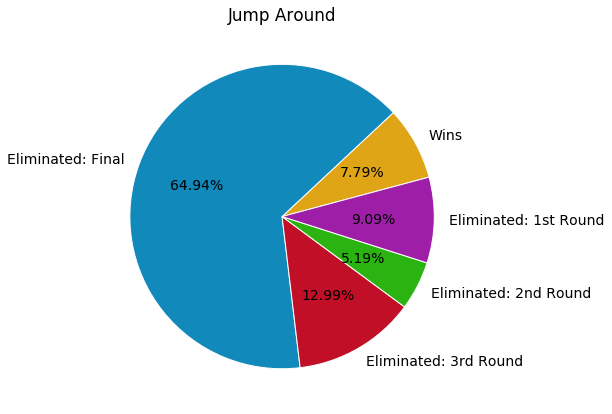

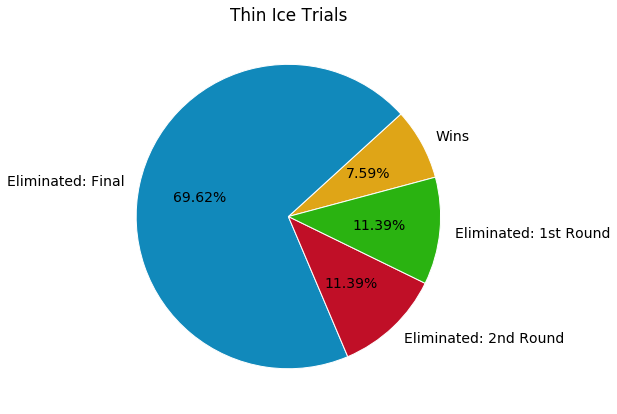

In [25]:
# Get a pie chart for success in playlists that are of the 'same' final
special_shows = ['event_only_floor_fall', 'event_only_jump_club', 'event_only_thin_ice']

for special_show in special_shows:
    fgv.specialShowsPie(special_show, shows_df, explode=False, percent=True)

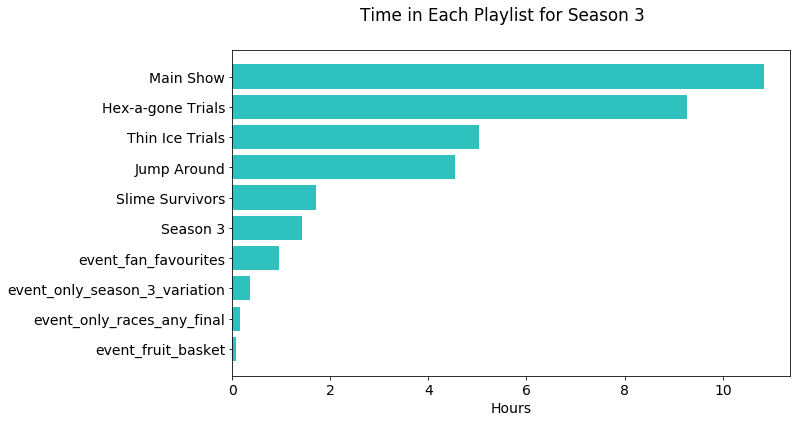

In [26]:
# Get a bar chart for playlist playtime for a season
fgv.seasonPlaylistTimeBar(shows_df, 3, True)

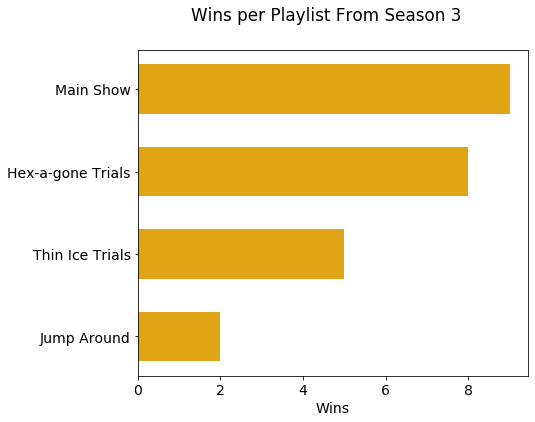

In [27]:
# Get a bar chart for wins per playlist from a season
fgv.seasonPlaylistWinsBar(shows_df, season=3)

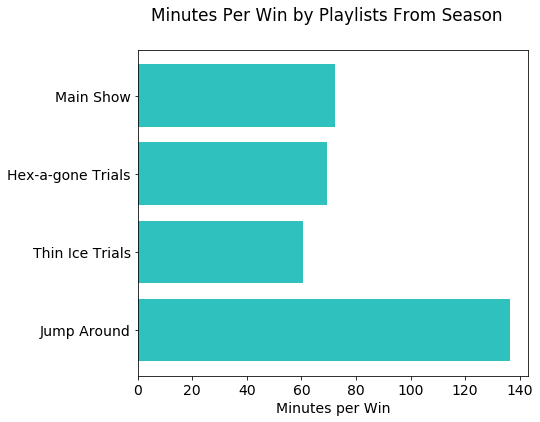

In [28]:
# Get a bar chart for minutes per win per playlist from a season
fgv.seasonPlaylistMinutesPerWinBar(shows_df, season=3)

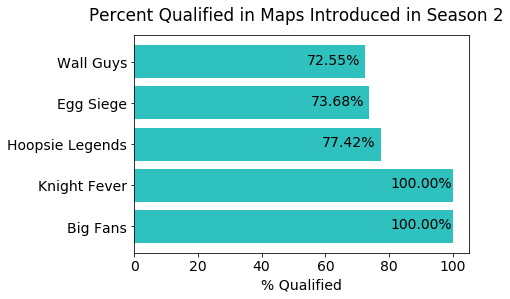

In [29]:
# Get a bar chart for percent qualified for maps introducted in a season
fgv.seasonMapsQualPercentBar(maps_df, season=2)

# side by side bars with attempts and times qualified?

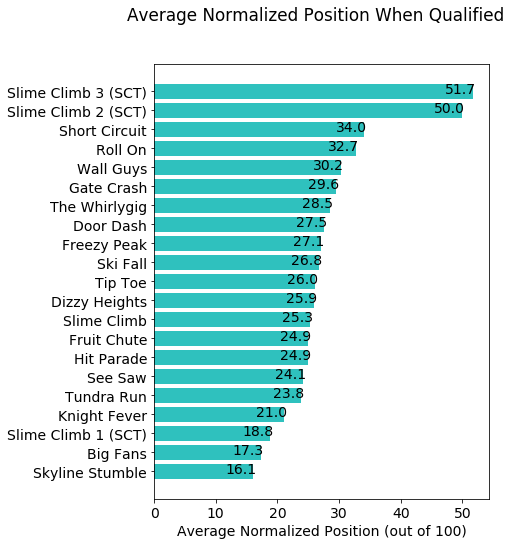

In [30]:
# Get a bar chart for average normalized position for race rounds when qualified
fgv.normalizedPositionRaceBar(maps_df)

C:\Users\Joseph\BreadTeleportationTechnology\DataScience\Fall Guys\fallGuysFcns.py:427: RuntimeWarning: divide by zero encountered in double_scalars
  'Minutes Per Win': shows_df['Time Taken'].sum() / 60 / shows_df['Crowns'].sum(),


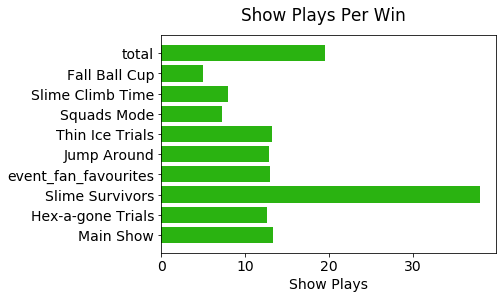

In [31]:
# Get a bar chart for plays per win for each playlist in a season (or overall)
fgv.playsPerWinPlaylistBar(shows_df, rounds_df, season=None, shorten=True)

0.4782608695652174

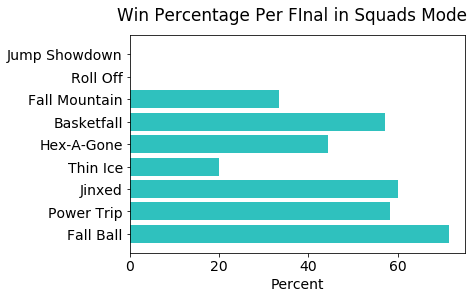

In [32]:
# Get a bar chart for win percentage in each final in Squads Mode
fgv.squadsFinalWinPercentBar(squad_shows_df, squad_rounds_df)

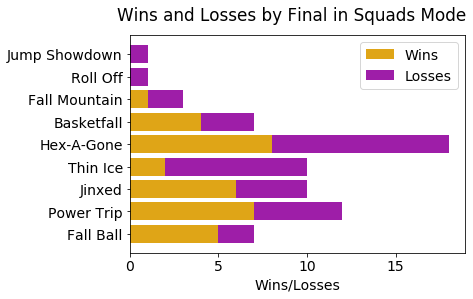

In [33]:
# Get a stacked bar plot for wins and fails per final in Squads Mode
fgv.squadsFinalStackedBar(squad_shows_df, squad_rounds_df)

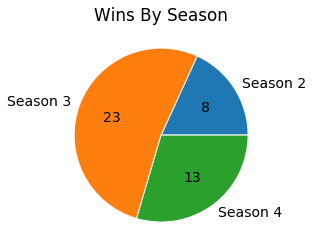

In [34]:
# Get a pie chart for normal wins by season
fgv.winsBySeasonPie(shows_df);

In [35]:
# Gets the top n times for a map
times = getTopTimes(rounds_df, shows_df, 'round_biggestfan', n=5)
times[['Time Spent', 'Show ID', 'Start Time', 'Season']]

,Time Spent,Show ID,Start Time,Season
0,55.290,113,2020-12-08 22:16:56.350000,2
1,55.319,633,2021-04-07 22:19:38.526000,4
2,55.339,115,2020-12-10 21:40:02.119000,2
3,56.420,103,2020-12-07 22:14:36.447000,2
4,61.155,35,2020-11-26 23:39:21.163000,2


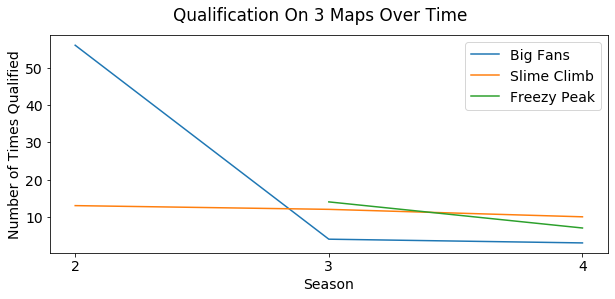

In [36]:
# Qualification percent by month
rounds = 'round_biggestfan'
rounds = ['round_biggestfan', 'round_lava', 'round_iceclimb']

# Get a line plot for performance on a map or list of maps over time
fgv.mapStatsOverTimeLine(rounds_df, shows_df, rounds, metric='qual', time_period='season', rotate=False)